# Tutorial Six: Clustering

## 载入package

以下是运行本次实验中必要的package。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## 参数设置

在本次实验中，我们采用取随机种子的方式构建数据集。随机种子取的是1；样本量为1500。在同学的作业中，保持样本量不变，随机种子取自己的学号。

In [9]:
# ============
# Generate datasets
# ============
np.random.seed(1)
n_samples = 1500 # sample size

# ============
# Definitions of Fuctions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

## 人工数据集

以下我们提供了五种的人工数据集的构造方式，并给出了未聚类前的图象。此外，请自行提供一种人工数据集的构造方式。

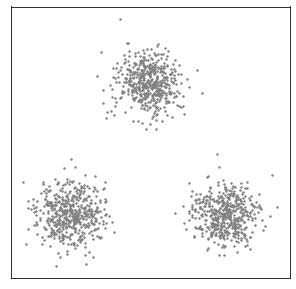

In [10]:
## Case One : Simple Case (Equal Variance and Equal Size)
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="grey",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="grey",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="grey",s = 2)


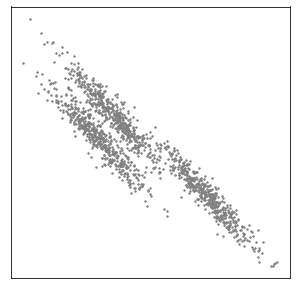

In [11]:
## Case Two : High-Covariance Case 
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="grey",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="grey",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="grey",s = 2)

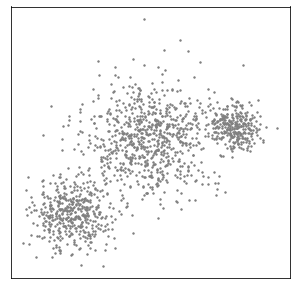

In [12]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="grey",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="grey",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="grey",s = 2)

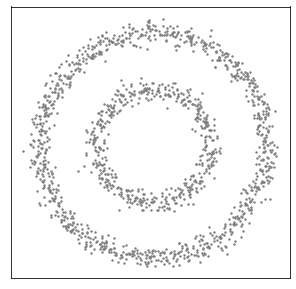

In [13]:
## Case Four : Ring Plot
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="grey",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="grey",s = 2)

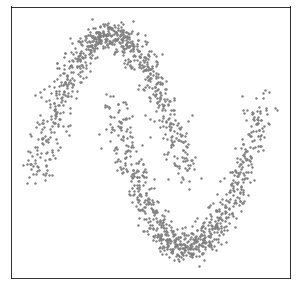

In [14]:
## Case Five : Wave Plot
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset4 = np.r_[x51,x52]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="grey",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="grey",s = 2)


## 任务

本次实验中，采用人造数据的方式构建不同类型的点集。每个点集均是一个二维数据集$\{(x_{i,1},x_{i,2}),i=1,2,\cdots,n\}$。本次实验的目的是让同学们形象地理解不同的聚类方法在不同类型的数据集上的表现是不同的，而且能够掌握如何构造人工数据集，并以此可以用于聚类方法的比较。
1. 阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。
2. 采用不同的聚类方式（包括：层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。
3. 请用绘图的方式展示不同聚类方式的结果。
4. 在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法，结果请填入下表。

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
</table>

5. 通过本次实验，分析一下各类聚类方法的使用范围。

参考资料：https://scikit-learn.org/stable/modules/clustering.html#clustering